In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PyTorchAberrations.aberration_layers import FreeSpacePropagationFunction

## 1. Check gradient of the function using `grad_check`

In [2]:
func = FreeSpacePropagationFunction.apply
dtype  = torch.complex128
E_in = torch.randn(1,1,2,2).type(dtype)
# E_in[0,0,0,0] = 1.
E_in.requires_grad_(True)
# kz = torch.randn(1).type(torch.complex64)
z = torch.tensor(1).type(torch.float64)
# kz = torch.randn(1,1,2,2).type(dtype)
z.requires_grad_(True)
dx = torch.tensor(2*3.14).type(torch.float64)
dx.requires_grad_(False)
lbda = torch.tensor(1).type(torch.float64)
lbda.requires_grad_(False)
inputs = (E_in, z, dx, lbda)

In [3]:
torch.autograd.gradcheck(func, inputs, eps = 1e-4, atol = 1e-4)

True

## 2. Vizualize the diffraction of two sources

In [4]:
Nx = 100
d = 1

E0 = torch.zeros(Nx, Nx+2).type(torch.complex64)
# E0[Nx//2-d,Nx//2] = 1.
# E0[Nx//2+d,Nx//2] = 1.
E0[Nx//2,Nx//2-d] = 1.
E0[Nx//2,Nx//2+d] = 1.

In [5]:
z = torch.tensor(30)
dx = torch.tensor(1.)
lambda_ = torch.tensor(0.5)

# after propagation
E2 = FreeSpacePropagationFunction.apply(E0[None,None,...], z, dx, lambda_)

<IPython.core.display.Javascript object>


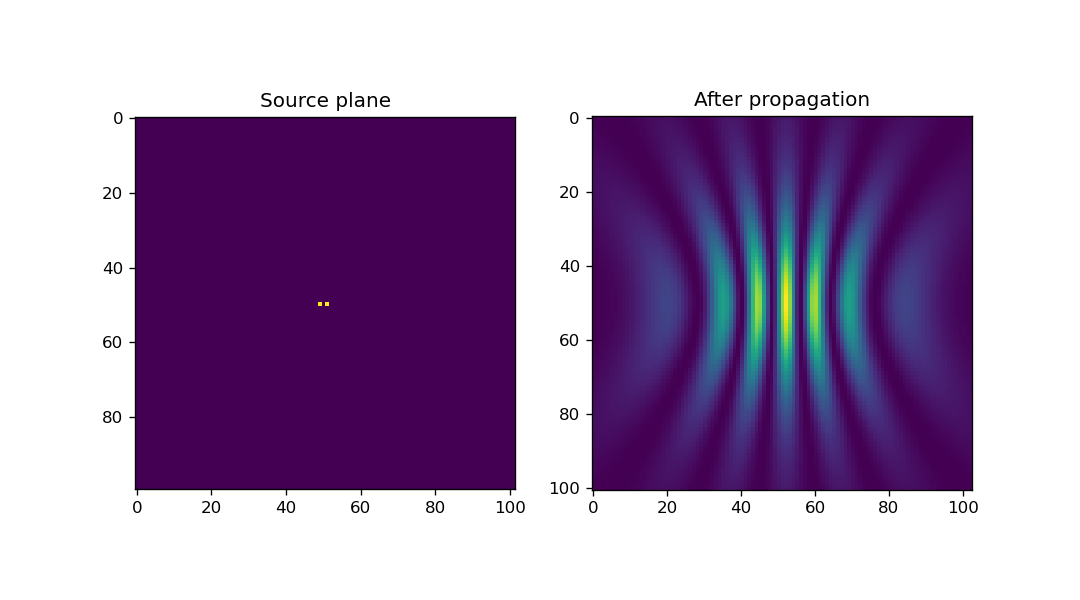

Text(0.5, 1.0, 'After propagation')

In [11]:
%matplotlib notebook

I2 = np.abs(E2.numpy().squeeze())**2

plt.figure(figsize = (9,5))
plt.subplot(121)
plt.imshow(np.abs(E0.numpy()**2))
plt.title('Source plane')
plt.subplot(122)
plt.imshow(I2)
plt.title('After propagation')

## 3. Use as module (layer)

In [7]:
from PyTorchAberrations.aberration_layers import FreeSpacePropagation

In [9]:
fsp = FreeSpacePropagation(dx = 1., 
                           lambda_ = 1., 
                           z_init_value = 0.)


x = E0[None,None,...]
y = fsp(x)
# just a random cost function
loss = (y.abs()**2).sum()

loss.backward()


In [10]:
fsp.z.grad

tensor(-405846.3438)